In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

**1.** Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {
    'year': '2016',
    'query_text': 'fire'
}
response = requests.get(endpoint, params = params)
response

<Response [200]>

In [3]:
fire = response.json()
fire

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [4]:
fire_searches = pd.DataFrame({'Month': [fire[x].get('month_name') for x in range(0, 12)], 'Searches': [fire[x].get('query_count') for x in range(0, 12)]})
fire_searches['Month'] = fire_searches['Month'].astype('string')
fire_searches['Searches'] = fire_searches['Searches'].astype('int')
fire_searches


,Month,Searches
0,January,19
1,February,35
2,March,32
3,April,26
4,May,24
5,June,31
6,July,24
7,August,47
8,September,36
9,October,38


In [5]:
total = fire_searches['Searches'].sum()
total

382

In [6]:
fire_searches[fire_searches['Searches']==fire_searches['Searches'].max()]

,Month,Searches
7,August,47


**A1:** There were 382 searches for "fire" in 2016, with August being the highest, at 47.

**Q2.** Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

In [7]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000&&$where=query_count>100.0'
#Socrata limits queries to 1,000 rows by default - maximum limit supported is 50,000, which is enough for this entire data set.
response = requests.get(endpoint)
response

<Response [200]>

In [8]:
res = response.json()
len(res)

1262

**A2.** There are 1,262 occurances of a query being run more than 100 times in a month.

**Q3.** Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur? 

In [9]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000&$where=query_count>100.0&query_text=codes'
response = requests.get(endpoint)
response

<Response [200]>

In [10]:
codes = response.json()
len(codes)

56

**A3.** There are 57 occurances of "codes" being queried more than 100 times in a month.

**Q4.** Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [11]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000&query_text=Maps'
response = requests.get(endpoint)
response

<Response [200]>

In [12]:
maps = response.json()
len(maps)

57

In [21]:
maps_searches = pd.DataFrame({'Month': [pd.to_datetime(maps[x].get('month_name'), format = '%B').strftime('%B') for x in range(0, len(maps))], 'Searches': [int(maps[x].get('query_count')) for x in range(0, len(maps))]})
maps_searches.reindex()
maps_searches

,Month,Searches
0,January,12
1,April,11
2,May,10
3,July,12
4,August,8
5,September,7
6,October,8
7,November,9
8,January,15
9,April,18


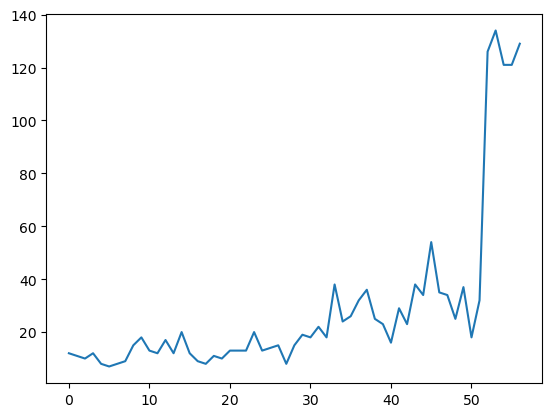

In [17]:
plt.plot(maps_searches['Searches'])